In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [61]:
df = pd.read_csv("./data/암.csv", encoding='cp949')
df.head()

,시도,시군구,연령,성별,전체대상자수,전체수검자수,위암대상자수,위암수검자수,대장암대상자수,대장암수검자수,간암대상자수,간암수검자수,유방암대상자수,유방암수검자수,자궁경부암대상자수,자궁경부암수검자수,폐암대상자수,폐암수검자수
0,서울특별시,종로구,20-24세,여자,2077,788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2077.0,788.0,NaN,NaN
1,서울특별시,종로구,25-29세,여자,2084,1173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2084.0,1173.0,NaN,NaN
2,서울특별시,종로구,30-34세,여자,2832,1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2832.0,1732.0,NaN,NaN
3,서울특별시,종로구,35-39세,여자,1837,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1837.0,1105.0,NaN,NaN
4,서울특별시,종로구,40-44세,남자,2673,1478,2613.0,1437.0,NaN,NaN,126.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN


- 전체 대상자수: 각 암검진 항목별 대상자 중 중복을 제거한 실 대상자 수
- 전체 수검자수: 각 암검진 항목별 수검자 중 중복을 제거한 실 수검자 수

# 데이터 확인

In [62]:
df.dtypes

시도            object
시군구           object
연령            object
성별            object
전체대상자수         int64
전체수검자수         int64
위암대상자수       float64
위암수검자수       float64
대장암대상자수      float64
대장암수검자수      float64
간암대상자수       float64
간암수검자수       float64
유방암대상자수      float64
유방암수검자수      float64
자궁경부암대상자수    float64
자궁경부암수검자수    float64
폐암대상자수       float64
폐암수검자수       float64
dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시도         6001 non-null   object 
 1   시군구        6001 non-null   object 
 2   연령         6001 non-null   object 
 3   성별         6001 non-null   object 
 4   전체대상자수     6001 non-null   int64  
 5   전체수검자수     6001 non-null   int64  
 6   위암대상자수     5000 non-null   float64
 7   위암수검자수     5000 non-null   float64
 8   대장암대상자수    4000 non-null   float64
 9   대장암수검자수    4000 non-null   float64
 10  간암대상자수     4997 non-null   float64
 11  간암수검자수     4997 non-null   float64
 12  유방암대상자수    2500 non-null   float64
 13  유방암수검자수    2500 non-null   float64
 14  자궁경부암대상자수  3500 non-null   float64
 15  자궁경부암수검자수  3500 non-null   float64
 16  폐암대상자수     2254 non-null   float64
 17  폐암수검자수     2254 non-null   float64
dtypes: float64(12), int64(2), object(4)
memory usage: 844.0+ KB


In [65]:
df.describe()

,전체대상자수,전체수검자수,위암대상자수,위암수검자수,대장암대상자수,대장암수검자수,간암대상자수,간암수검자수,유방암대상자수,유방암수검자수,자궁경부암대상자수,자궁경부암수검자수,폐암대상자수,폐암수검자수
count,6001.000000,6001.000000,5000.000000,5000.000000,4000.000000,4000.000000,4997.000000,4997.000000,2500.000000,2500.000000,3500.000000,3500.000000,2254.000000,2254.000000
mean,3988.895684,2258.765372,2680.985400,1692.514000,4100.959000,1625.890750,164.385631,122.156294,2791.812400,1803.545600,2715.208571,1638.758286,112.307897,51.631322
std,4066.026249,2464.013003,2820.505252,1853.812067,4115.392178,1739.586379,184.689765,140.976178,2869.852551,2029.153049,2788.589927,1920.092620,166.496216,82.689067
min,1.000000,0.000000,24.000000,1.000000,62.000000,4.000000,1.000000,0.000000,61.000000,1.000000,50.000000,0.000000,1.000000,0.000000
25%,1122.000000,499.000000,716.000000,387.000000,1268.500000,391.000000,34.000000,21.000000,794.750000,379.000000,690.500000,272.000000,4.000000,2.000000
50%,2530.000000,1279.000000,1538.500000,912.000000,2464.000000,920.500000,88.000000,63.000000,1606.000000,910.500000,1650.000000,837.000000,39.000000,14.000000
75%,5593.000000,3304.000000,3870.000000,2526.250000,5699.500000,2413.000000,247.000000,187.000000,3961.000000,2721.000000,3990.500000,2444.750000,157.750000,69.750000
max,32967.000000,21601.000000,24228.000000,14475.000000,30769.000000,15733.000000,1611.000000,1103.000000,23143.000000,15055.000000,23527.000000,15408.000000,1616.000000,878.000000


In [66]:
df.shape

(6001, 18)

## 결측치 확인

In [67]:
df.isna().sum().loc[df.isna().sum() >= 1]

위암대상자수       1001
위암수검자수       1001
대장암대상자수      2001
대장암수검자수      2001
간암대상자수       1004
간암수검자수       1004
유방암대상자수      3501
유방암수검자수      3501
자궁경부암대상자수    2501
자궁경부암수검자수    2501
폐암대상자수       3747
폐암수검자수       3747
dtype: int64

## 결측치 시각화

<Axes: >

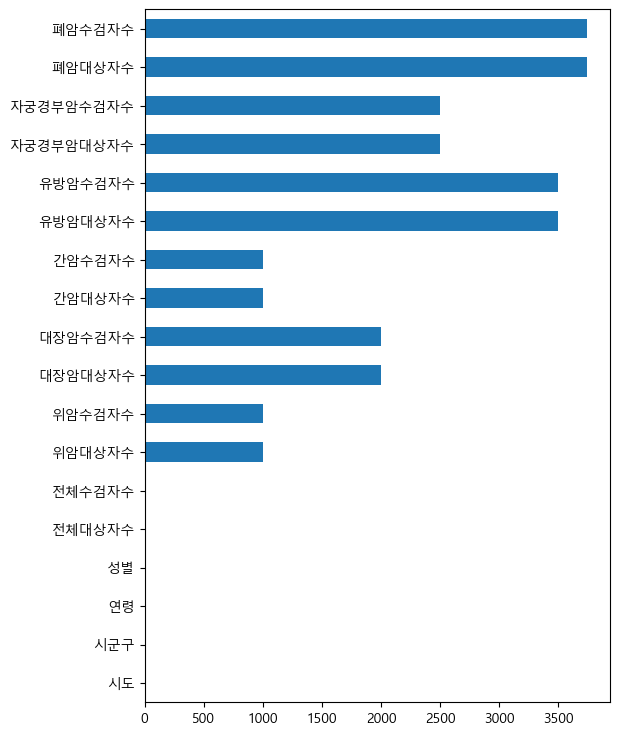

In [68]:
df.isnull().sum().plot.barh(figsize=(6,9))

### 결측치를 가지고 있는 컬럼의 수가 많음

- 해당 결측치들은 암검진을 진행하고 해당 암이 발견되지 않은 대상자이므로 fillna로 0처리

In [70]:
df.fillna(0).head()

,시도,시군구,연령,성별,전체대상자수,전체수검자수,위암대상자수,위암수검자수,대장암대상자수,대장암수검자수,간암대상자수,간암수검자수,유방암대상자수,유방암수검자수,자궁경부암대상자수,자궁경부암수검자수,폐암대상자수,폐암수검자수
0,서울특별시,종로구,20-24세,여자,2077,788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2077.0,788.0,0.0,0.0
1,서울특별시,종로구,25-29세,여자,2084,1173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2084.0,1173.0,0.0,0.0
2,서울특별시,종로구,30-34세,여자,2832,1732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2832.0,1732.0,0.0,0.0
3,서울특별시,종로구,35-39세,여자,1837,1105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1837.0,1105.0,0.0,0.0
4,서울특별시,종로구,40-44세,남자,2673,1478,2613.0,1437.0,0.0,0.0,126.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0


# 데이터 전처리

## 서울특별시 시도별 분류

In [71]:
seoul_data = df[df['시도']=='서울특별시']
seoul_data.head()

,시도,시군구,연령,성별,전체대상자수,전체수검자수,위암대상자수,위암수검자수,대장암대상자수,대장암수검자수,간암대상자수,간암수검자수,유방암대상자수,유방암수검자수,자궁경부암대상자수,자궁경부암수검자수,폐암대상자수,폐암수검자수
0,서울특별시,종로구,20-24세,여자,2077,788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2077.0,788.0,NaN,NaN
1,서울특별시,종로구,25-29세,여자,2084,1173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2084.0,1173.0,NaN,NaN
2,서울특별시,종로구,30-34세,여자,2832,1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2832.0,1732.0,NaN,NaN
3,서울특별시,종로구,35-39세,여자,1837,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1837.0,1105.0,NaN,NaN
4,서울특별시,종로구,40-44세,남자,2673,1478,2613.0,1437.0,NaN,NaN,126.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN


## 전체대상자 및 전체수검자 수 분리

In [72]:
data = seoul_data.loc[:,['시군구', '연령', '성별', '전체대상자수', '전체수검자수'] ]
data

,시군구,연령,성별,전체대상자수,전체수검자수
0,종로구,20-24세,여자,2077,788
1,종로구,25-29세,여자,2084,1173
2,종로구,30-34세,여자,2832,1732
3,종로구,35-39세,여자,1837,1105
4,종로구,40-44세,남자,2673,1478
...,...,...,...,...,...
595,강동구,75-79세,여자,4976,2154
596,강동구,80-84세,남자,2530,1098
597,강동구,80-84세,여자,3115,1058
598,강동구,85세 이상,남자,1115,252


In [73]:
sex_data = seoul_data.groupby(['시군구','성별']).agg({ '전체대상자수': 'sum', '전체수검자수': 'sum'})
sex_data = pd.DataFrame(sex_data).reset_index()
sex_data.head()

,시군구,성별,전체대상자수,전체수검자수
0,강남구,남자,95272,42370
1,강남구,여자,141550,75124
2,강동구,남자,84709,45327
3,강동구,여자,121878,71877
4,강북구,남자,60009,30662


In [74]:
age_data = seoul_data.groupby(['시군구','연령']).agg({ '전체대상자수': 'sum', '전체수검자수': 'sum'})
age_data = pd.DataFrame(age_data).reset_index()
age_data.head()

,시군구,연령,전체대상자수,전체수검자수
0,강남구,20-24세,6471,1875
1,강남구,25-29세,6791,3928
2,강남구,30-34세,11588,7378
3,강남구,35-39세,7987,5044
4,강남구,40-44세,25545,16020


In [75]:
data["전체수검자수(%)"] = round(data["전체수검자수"] / data["전체대상자수"] * 100, 1)
data.pivot_table(index = "성별", values = "전체수검자수(%)", aggfunc = "mean")
data.pivot_table(index = "시군구", values = "전체수검자수(%)", aggfunc = "mean")
data.head()

,시군구,연령,성별,전체대상자수,전체수검자수,전체수검자수(%)
0,종로구,20-24세,여자,2077,788,37.9
1,종로구,25-29세,여자,2084,1173,56.3
2,종로구,30-34세,여자,2832,1732,61.2
3,종로구,35-39세,여자,1837,1105,60.2
4,종로구,40-44세,남자,2673,1478,55.3


## 강남구별 연령 및 전체대상자, 수검사 수

In [76]:
age_test = age_data[age_data["시군구"] == "강남구"]
age_test

,시군구,연령,전체대상자수,전체수검자수
0,강남구,20-24세,6471,1875
1,강남구,25-29세,6791,3928
2,강남구,30-34세,11588,7378
3,강남구,35-39세,7987,5044
4,강남구,40-44세,25545,16020
5,강남구,45-49세,19691,12576
6,강남구,50-54세,40422,18949
7,강남구,55-59세,29347,12249
8,강남구,60-64세,27302,13484
9,강남구,65-69세,23167,10575


TypeError: unsupported operand type(s) for -: 'str' and 'float'

<Figure size 1500x1000 with 0 Axes>

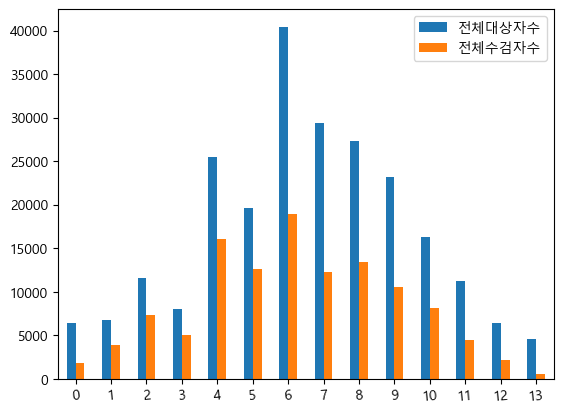

In [77]:
plt.figure(figsize = (15, 10))

w = 0.3
age_test.plot(kind = "bar", rot=5)
plt.bar(age_test["연령"] - w, age_test["전체대상자수"], width = w, label = "전체대상자수")
plt.bar(age_test["연령"] + w, age_test["전체수검자수"], width = w, label = "전체수검자수")


plt.xlabel("연령")
plt.ylabel("강남구")
plt.title("강남구 연령별 암 대상자 및 수검자 수")
plt.grid()
plt.show()

plt.savefig(format='jpeg')

## 연령별

In [79]:
sex_data["전체수검자수(%)"] = round(seoul_data["전체수검자수"] / seoul_data["전체대상자수"] * 100, 1)

In [81]:
# 성별 별 전체수검자수 비율 평균
sex_data.pivot_table(index = "성별", values = "전체수검자수", aggfunc = "mean")

,전체수검자수
성별,
남자,36213.60
여자,60628.16


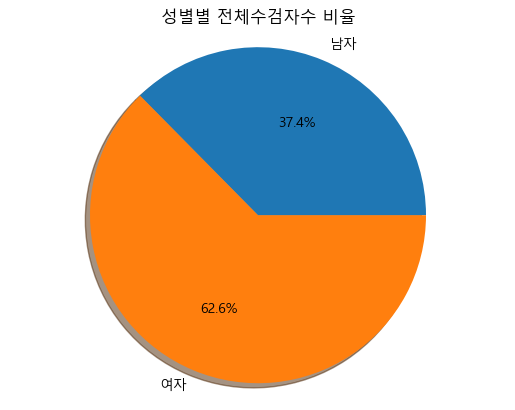

In [78]:
# 성별별 전체수검자수비율 파이차트
sex_data = sex_data.pivot_table(index = "성별", values = "전체수검자수", aggfunc = "mean")

plt.pie(sex_data["전체수검자수"], labels=sex_data.index, autopct='%1.1f%%', shadow = True)
plt.axis('equal') 
plt.title("성별별 전체수검자수 비율")
plt.show()